## Task 1 [40 marks]

**Perceptron Algorithm for Setosa vs. Versicolor Classification**

In this task, we will replicate the previous steps of the tutorial to perform binary classification between the Setosa and Versicolor classes using the same two features, namely petal length and sepal length. Your report should include the following components:

### Steps to Follow:

1. **Data Selection:**
   - Choose the Setosa and Versicolor classes from the Iris dataset.
   - Select the petal length and sepal length features as done in the previous task.

2. **Data Visualisation:**
   - Generate a plot that clearly demonstrates the linear separability of the Setosa and Versicolor classes based on the selected features.

3. **Perceptron Algorithm Execution:**
   - Implement the perceptron algorithm for the Setosa vs. Versicolor classification task.
   - Specify the number of iterations to perform during the algorithm execution.

4. **Misclassification Analysis:**
   - Create a plot illustrating the change in misclassified samples across the iterations of the perceptron algorithm.

5. **Final Weight Reporting:**
   - Report the final weight values obtained as a result of the perceptron algorithm.

6. **Code Showcase:**
   - Include the code segments that you modified or added for each step of the process.
   - Discuss the specific adaptations you made to the code to suit the Setosa vs. Versicolor classification.


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


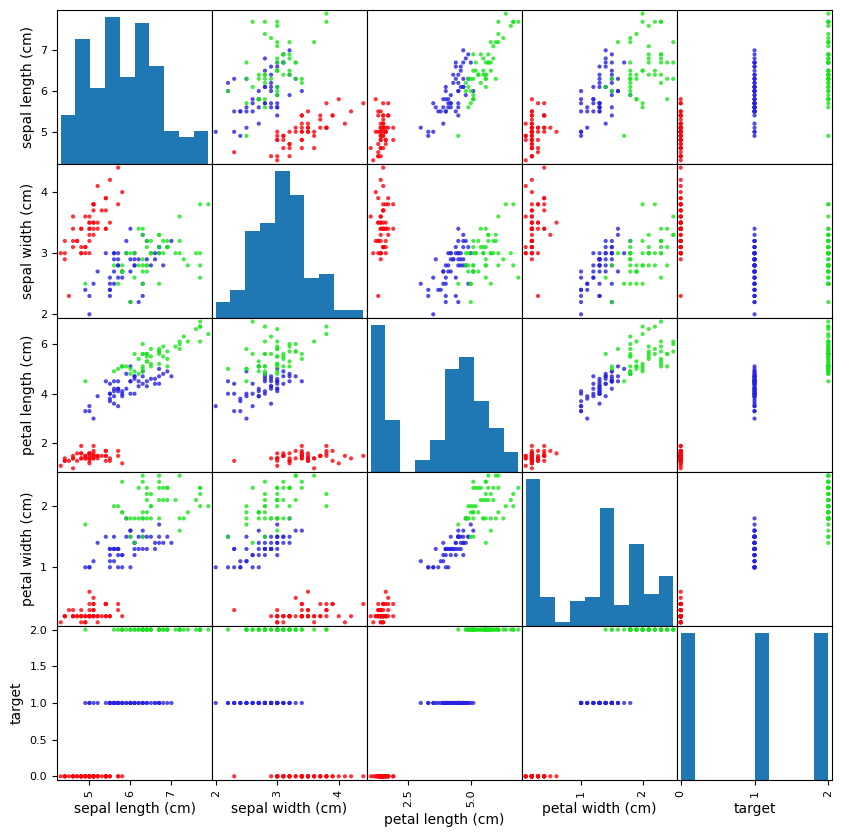

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
iris = load_iris()

# This command generates a decsription of the dataset if you need more information
print(iris['DESCR'])

from pandas.plotting import scatter_matrix
import pandas as pd

iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])

"""
Generate a scatter matrix plot to visualize the relationships between different features in the Iris dataset.
Each subplot in the matrix shows the scatter plot between two different features, while histograms on the diagonal
show the distribution of each individual feature. The color of points in the scatter plots is determined by the
corresponding class labels (Setosa, Versicolor, Virginica), where each class is assigned a distinct color.
The plot provides insights into possible patterns, correlations, and separations among features, aiding in data exploration.
"""

iris_data["target"] = iris['target']
color_dictionary = {1: "#FE010A", 2: "#2722DD", 3: "#1BE41D"}
colors = iris_data["target"].map(lambda x: color_dictionary.get(x + 1))
ax = scatter_matrix(iris_data, color=colors, alpha=0.8, figsize=(10, 10), diagonal='hist')

iris_data


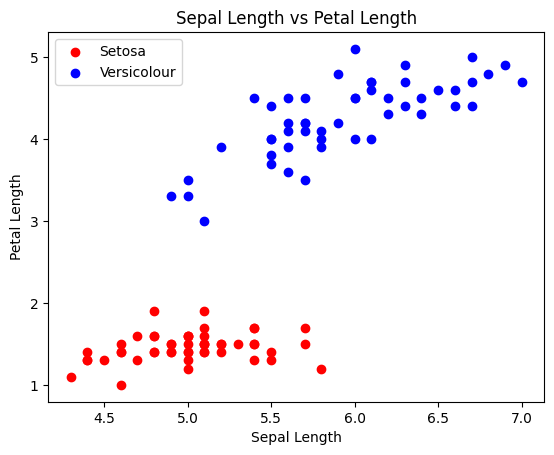

In [3]:
setosa_label = iris_data.iloc[0:50,4].values
versicolour_label = iris_data.iloc[50:100,4].values # changed from [100:150] to [50:100] to get versicolor
labels = np.concatenate((setosa_label,versicolour_label))#change concatenate content
y = np.where(labels == 0, -1, 1)

X_setosa = iris_data.iloc[0:50, [0,2]]
X_versicolour = iris_data.iloc[50:100, [0,2]] # changed from [100:150] to [50:100] to get versicolor
X = np.concatenate((X_setosa,X_versicolour))#change concatenate content

plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='Setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='o',label='Versicolor') #change label and data
plt.title("Sepal Length vs Petal Length")
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')
plt.show()

Iteration:  1
Weights:  [0.  1.9 3.3]
Misclassified Samples:  50


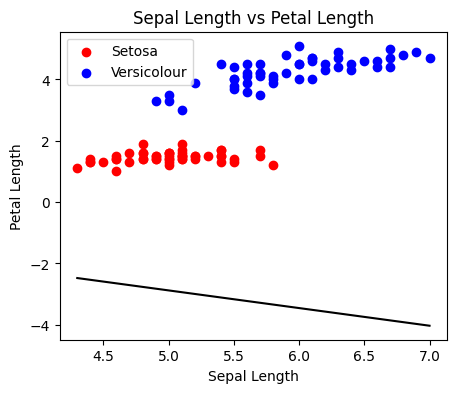

Iteration:  2
Weights:  [0.  3.8 6.6]
Misclassified Samples:  50


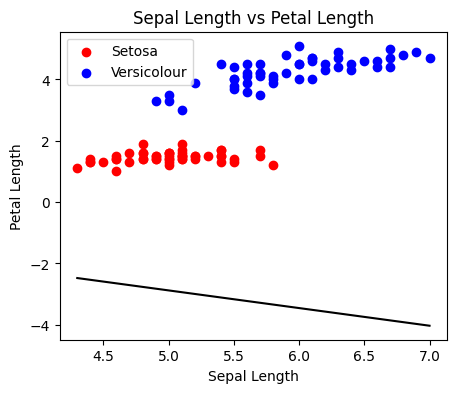

Iteration:  3
Weights:  [-1.   1.1  8.4]
Misclassified Samples:  50


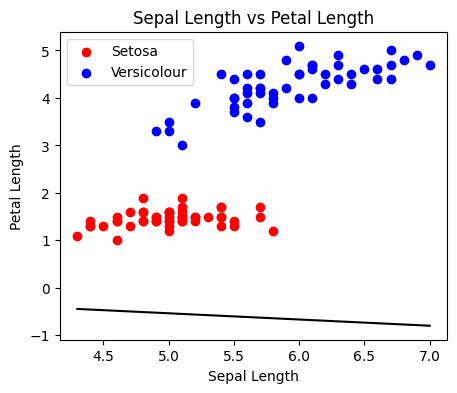

Iteration:  4
Weights:  [-1.   1.7 10.5]
Misclassified Samples:  50


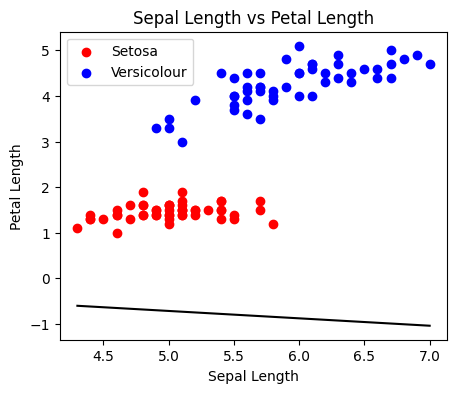

Iteration:  5
Weights:  [-2.  -3.4  9.1]
Misclassified Samples:  0


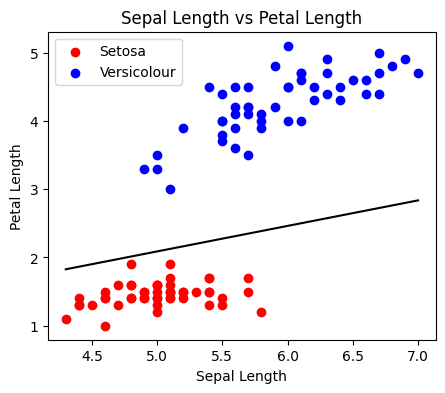

Iteration:  6
Weights:  [-2.  -3.4  9.1]
Misclassified Samples:  0


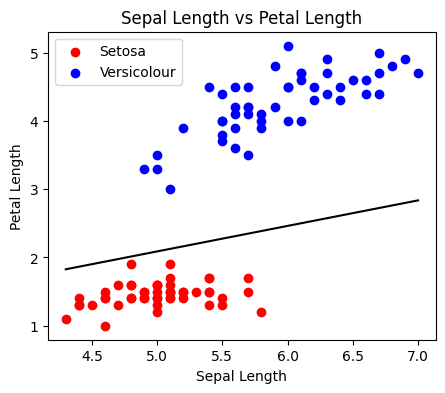

Iteration:  7
Weights:  [-2.  -3.4  9.1]
Misclassified Samples:  0


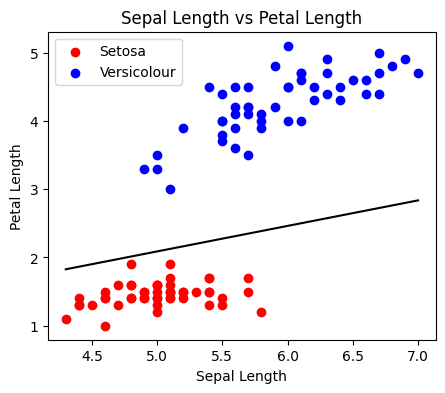

Iteration:  8
Weights:  [-2.  -3.4  9.1]
Misclassified Samples:  0


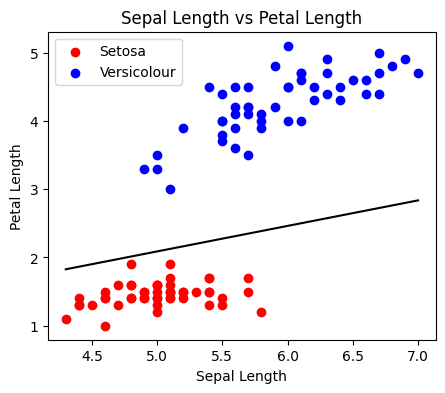

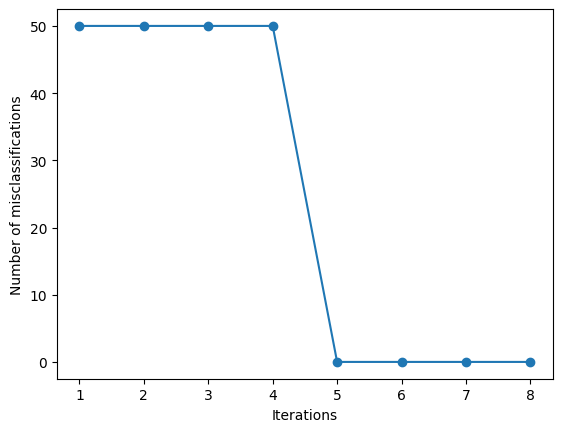

In [10]:
def predict(W, X):
        """ Return class label after each setp """
        return np.where(net_input(W, X) >= 0.0, 1, -1)

def net_input(W, X):
        """ Calculate net input """
        return np.dot(X, W[1:]) + W[0]

def plot_boundary(W, X):
    """Function to plot the boundary defined by the weights. Given equation."""
    """w0 + w1*x1 + w2*x2 = 0, used to generate the line."""

    # Calculate the slope and y-intercept of the boundary line
    slope = -W[1] / W[2]
    intercept = -W[0] / W[2]

    # Get the minimum and maximum x values from the dataset
    x_min = np.min(X[:, 0])
    x_max = np.max(X[:, 0])

    # Generate points for the boundary line to cover the whole plot
    x_vals = np.array([x_min, x_max])
    y_vals = slope * x_vals + intercept

    # This part here define the x-axis and y-axis style according to the data we are using
    plt.figure(figsize=(5, 4))
    plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
    plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='o', label='Versicolour') #change the label name
    plt.title("Sepal Length vs Petal Length")
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.legend(loc='upper left')

    # Plot the line using the calculated points
    plt.plot(x_vals, y_vals, 'black')

    plt.show()

def plot_errors(error):
    """ Function to plot number of misclassified samples """
    plt.plot(range(1, len(error) + 1), error,marker='o')
    plt.xlabel('Iterations')
    plt.ylabel('Number of misclassifications')
    plt.show()

def fit(n_iter, X, y):
        W = np.zeros(1 + X.shape[1])
        errors_ = []
        for i in range(n_iter):
            for j, (xi, target) in enumerate(zip(X,y)):
         #     update = target - predict(W, xi)
         #     W += 0.5*update*np.append(1,xi)
              if predict(W, xi) != target:
                  W = W + target * np.append(1,xi)
            # errors on whole dataset
            errors = 0
            for j, (xi, target) in enumerate(zip(X, y)):
                if predict(W, xi) != target:
                    errors += 1
            # -------------------------------------------
            errors_.append(errors)
            i += 1
            print ("Iteration: ", i)
            print("Weights: ", W)
            print("Misclassified Samples: ", errors)
            plot_boundary(W,X) # When weights are updated we plot the boundary
        plot_errors(errors_)
    
n_iter=8
fit(n_iter, X, y)